In [18]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from gujarati_tokenizer import GujaratiTokenizer

In [19]:
print("Loading Gujarati dataset from IndicCorpV2...")
dataset = load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", split="guj_Gujr", streaming=True)

Loading Gujarati dataset from IndicCorpV2...


In [ ]:

tokenizer = GujaratiTokenizer()

In [22]:
freq_dist = {}

for sample in dataset.take(10000):
    text = sample["text"]
    tokens = tokenizer.word_tokenize(text)
    for token in tokens:
        freq_dist[token] = freq_dist.get(token, 0) + 1

c:\Users\aryan\Documents\GitHub\nlp-ai3aa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2715 (\N{GUJARATI LETTER CHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\aryan\Documents\GitHub\nlp-ai3aa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Gujarati natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\aryan\Documents\GitHub\nlp-ai3aa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2759 (\N{GUJARATI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\aryan\Documents\GitHub\nlp-ai3aa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2693 (\N{GUJARATI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\aryan\Documents\GitHub\nlp-ai3aa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2728 (

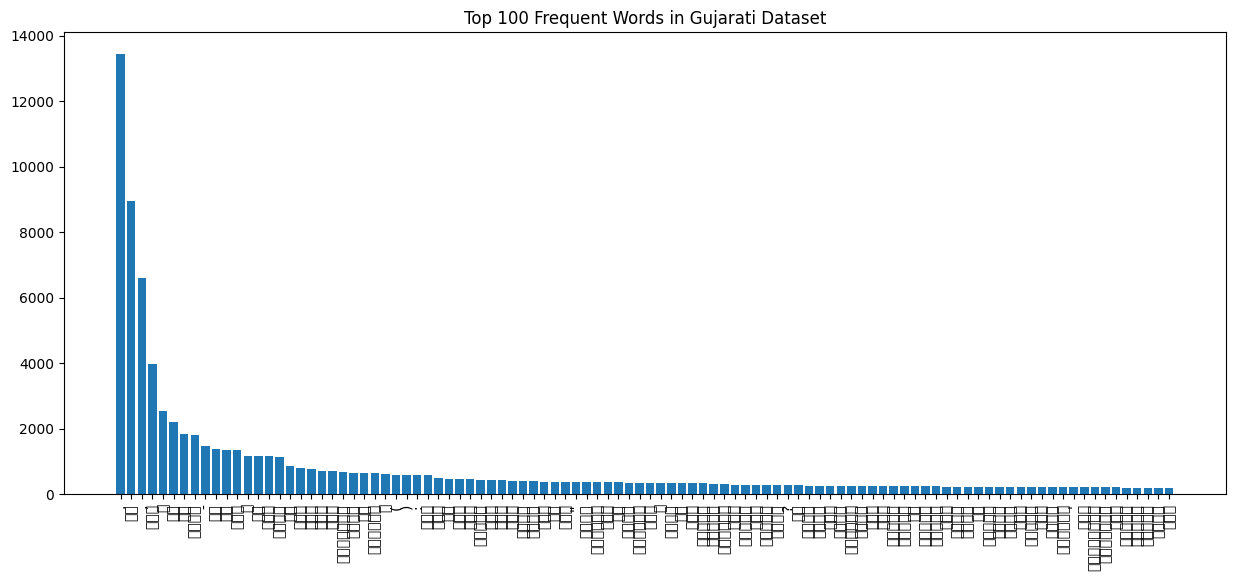

In [23]:
top_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)[:100]
words, counts = zip(*top_words)

plt.figure(figsize=(15,6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 100 Frequent Words in Gujarati Dataset")
plt.show()

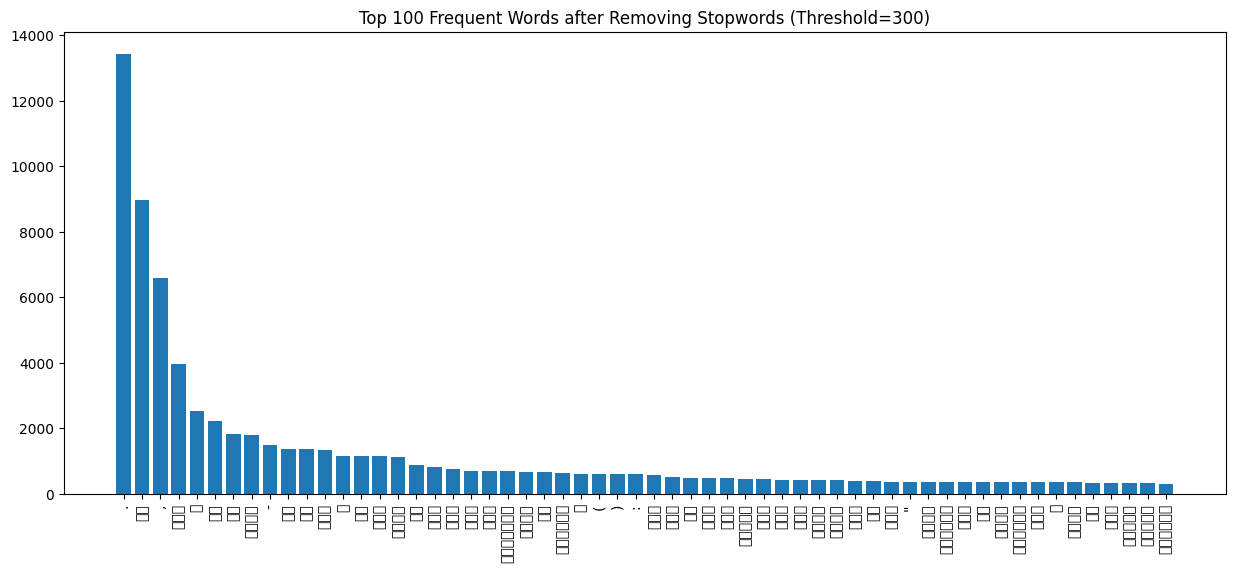

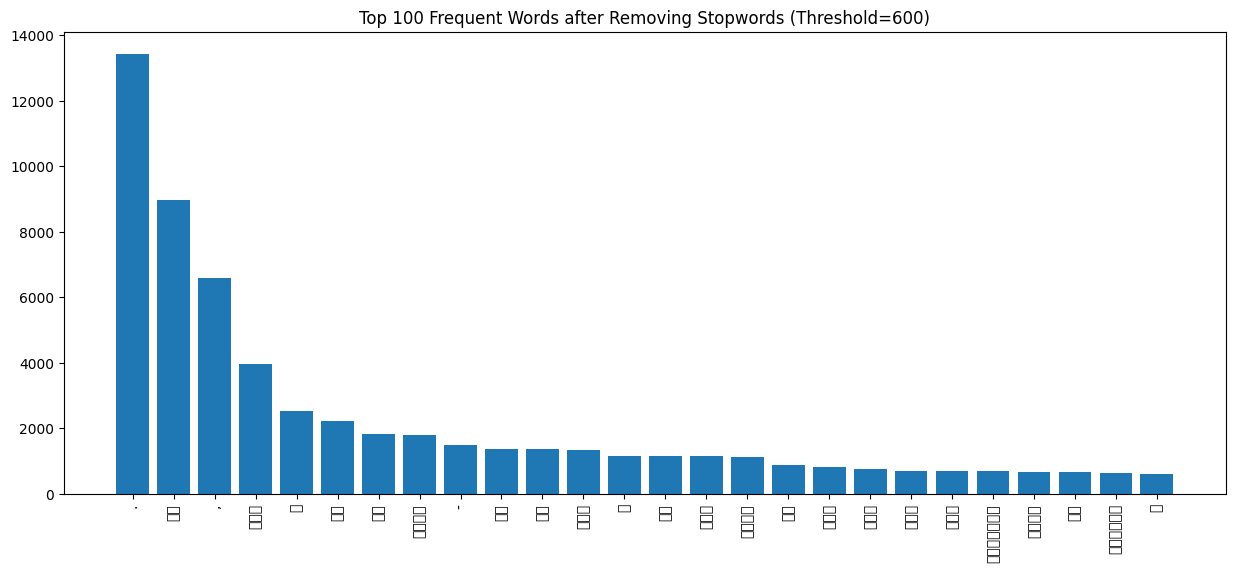

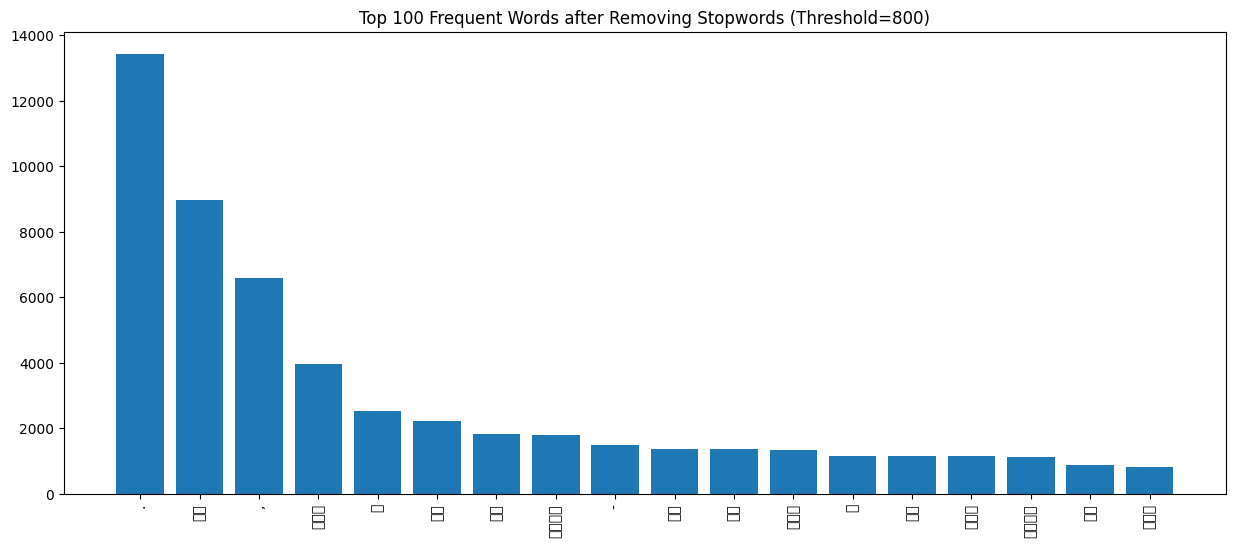

In [24]:
def remove_stopwords(freq_dict, threshold):
    return {word: count for word, count in freq_dict.items() if count > threshold}

for thresh in [300, 600, 800]:
    filtered = remove_stopwords(freq_dist, thresh)
    top_words = sorted(filtered.items(), key=lambda x: x[1], reverse=True)[:100]
    words, counts = zip(*top_words)

    plt.figure(figsize=(15,6))
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(f"Top 100 Frequent Words after Removing Stopwords (Threshold={thresh})")
    plt.show()

In [25]:
top_words

[('.', 13436),
 ('છે', 8956),
 (',', 6600),
 ('અને', 3972),
 ('આ', 2535),
 ('કે', 2218),
 ('પણ', 1834),
 ('માટે', 1802),
 ('-', 1486),
 ('એક', 1372),
 ('પર', 1366),
 ('કરી', 1348),
 ('જ', 1165),
 ('તે', 1163),
 ('હતી', 1158),
 ('સાથે', 1131),
 ('તો', 870),
 ('હતો', 812)]